## 1. 波士顿房价预测：一元线性回归

### 1.1 加载数据集

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [4]:
boston_housing = tf.keras.datasets.boston_housing
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [5]:
train_x.shape, train_y.shape

((404, 13), (404,))

In [6]:
test_x.shape, test_y.shape

((102, 13), (102,))

### 1.2 数据处理

In [7]:
x_train = train_x[:,5]
y_train = train_y

In [8]:
x_train.shape, y_train.shape

((404,), (404,))

In [9]:
x_test = test_x[:,5]
y_test = test_y

In [10]:
x_test.shape, y_test.shape

((102,), (102,))

### 1.3 设置超参数

In [11]:
learn_rate = 0.04
iter = 2000
display_step = 200

### 1.4 设置模型参数初始值

In [12]:
np.random.seed(612)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())


In [13]:
w.numpy().dtype,b.numpy().dtype

(dtype('float32'), dtype('float32'))

### 1.5 训练模型

In [14]:
mse_train = []
mse_test = []

for i in range(0, iter+1):
    
    with tf.GradientTape() as tape:
        
        pred_train = w*x_train+b
        loss_train = 0.5*tf.reduce_mean(tf.square(y_train-pred_train))
        
        pred_test = w*x_test+b
        loss_test = 0.5*tf.reduce_mean(tf.square(y_test-pred_test))
        
    mse_train.append(loss_train)
    mse_test.append(loss_test)
    
    dL_dw,dL_db = tape.gradient(loss_train,[w,b])
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
    if i%display_step == 0:
        print(f'i: {i}, Train Loss: {loss_train}, Test_Loss: {loss_test}')

i: 0, Train Loss: 321.83758544921875, Test_Loss: 337.5686340332031
i: 200, Train Loss: 28.12261390686035, Test_Loss: 26.237764358520508
i: 400, Train Loss: 27.14474105834961, Test_Loss: 25.099327087402344
i: 600, Train Loss: 26.341949462890625, Test_Loss: 24.14107894897461
i: 800, Train Loss: 25.682899475097656, Test_Loss: 23.33298110961914
i: 1000, Train Loss: 25.1418514251709, Test_Loss: 22.650157928466797
i: 1200, Train Loss: 24.69767189025879, Test_Loss: 22.072006225585938
i: 1400, Train Loss: 24.333024978637695, Test_Loss: 21.581432342529297
i: 1600, Train Loss: 24.03366470336914, Test_Loss: 21.164262771606445
i: 1800, Train Loss: 23.787904739379883, Test_Loss: 20.808696746826172
i: 2000, Train Loss: 23.586145401000977, Test_Loss: 20.50493812561035


### 1.6 可视化输出

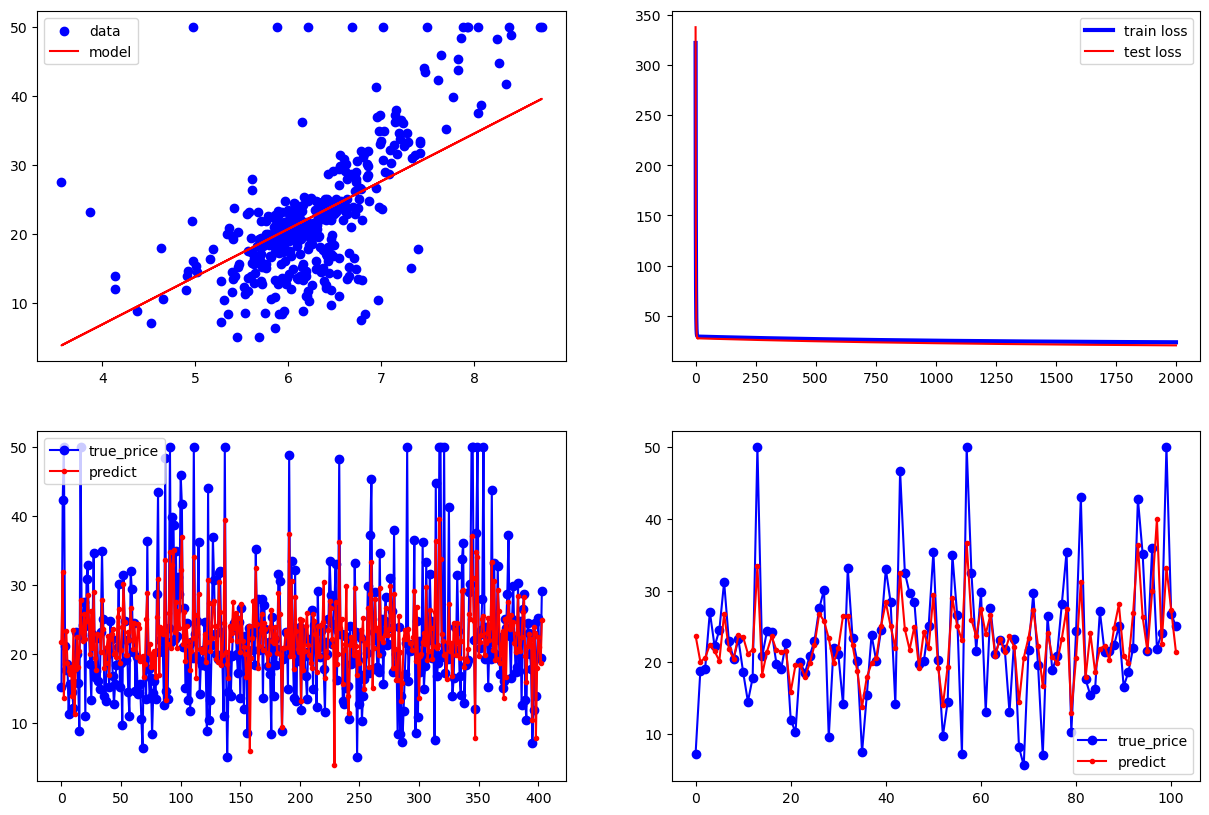

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x_train,y_train,color='b',label='data')
plt.plot(x_train, pred_train,color='r',label='model')
plt.legend(loc='upper left')

plt.subplot(222)
plt.plot(mse_train, color='b',linewidth=3,label='train loss')
plt.plot(mse_test, color='r',linewidth=1.5,label='test loss')
plt.legend(loc='upper right')

plt.subplot(223)
plt.plot(y_train, color='b', marker='o',label='true_price')
plt.plot(pred_train, color='r',marker='.',label='predict')
plt.legend()

plt.subplot(224)
plt.plot(y_test, color='b', marker='o', label='true_price')
plt.plot(pred_test, color='r', marker='.', label='predict')
plt.legend()

plt.show()

## 2.波士顿房价预测：多元线性回归

### 2.1 加载数据集

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [19]:
boston_housing = tf.keras.datasets.boston_housing
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [20]:
train_x.shape, train_y.shape

((404, 13), (404,))

In [21]:
test_x.shape, test_y.shape

((102, 13), (102,))

In [22]:
num_train = len(train_x)
num_test = len(test_x)

### 2.2 数据处理

In [23]:
x_train=(train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
y_train=train_y

x_test=(test_x-test_x.min(axis=0))/(test_x.max(axis=0)-test_x.min(axis=0))
y_test=test_y

In [25]:
x0_train = np.ones(num_train).reshape(-1,1)
x0_test = np.ones(num_test).reshape(-1,1)


In [26]:
X_train = tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)
X_test = tf.cast(tf.concat([x0_test, x_test], axis=1),tf.float32)

In [27]:
X_train.shape, X_test.shape

(TensorShape([404, 14]), TensorShape([102, 14]))

In [29]:
Y_train=tf.constant(y_train.reshape(-1,1),tf.float32)
Y_test=tf.constant(y_test.reshape(-1,1),tf.float32)

In [30]:
Y_train.shape,Y_test.shape

(TensorShape([404, 1]), TensorShape([102, 1]))

### 2.3 设置超参数

In [46]:
learn_rate = 0.01
iter = 3000
display_step = 100

### 2.4 设置模型变量初始值

In [47]:
np.random.seed(612)
W = tf.Variable(np.random.randn(14,1), dtype=tf.float32)

### 2.4 训练模型

In [48]:
mse_train=[]
mse_test=[]

for i in range(0,iter+1):
    
    with tf.GradientTape() as tape:
        
        PRED_train = tf.matmul(X_train,W)
        Loss_train = 0.5 * tf.reduce_mean(tf.square(Y_train-PRED_train))
        
        PRED_test = tf.matmul(X_test,W)
        Loss_test = 0.5 * tf.reduce_mean(tf.square(Y_test-PRED_test))
        
    mse_train.append(Loss_train)
    mse_test.append(Loss_test)
    
    dL_dW = tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step == 0:
        print(f'i: {i}, Train_loss: {Loss_train}, Test_loss: {loss_test}')

i: 0, Train_loss: 263.1934509277344, Test_loss: 20.50493812561035
i: 100, Train_loss: 44.476348876953125, Test_loss: 20.50493812561035
i: 200, Train_loss: 36.176551818847656, Test_loss: 20.50493812561035
i: 300, Train_loss: 31.584026336669922, Test_loss: 20.50493812561035
i: 400, Train_loss: 28.789461135864258, Test_loss: 20.50493812561035
i: 500, Train_loss: 26.911523818969727, Test_loss: 20.50493812561035
i: 600, Train_loss: 25.52069664001465, Test_loss: 20.50493812561035
i: 700, Train_loss: 24.40562629699707, Test_loss: 20.50493812561035
i: 800, Train_loss: 23.460527420043945, Test_loss: 20.50493812561035
i: 900, Train_loss: 22.630887985229492, Test_loss: 20.50493812561035
i: 1000, Train_loss: 21.88727378845215, Test_loss: 20.50493812561035
i: 1100, Train_loss: 21.212657928466797, Test_loss: 20.50493812561035
i: 1200, Train_loss: 20.596282958984375, Test_loss: 20.50493812561035
i: 1300, Train_loss: 20.030683517456055, Test_loss: 20.50493812561035
i: 1400, Train_loss: 19.510202407836

### 2.5 可视化输出

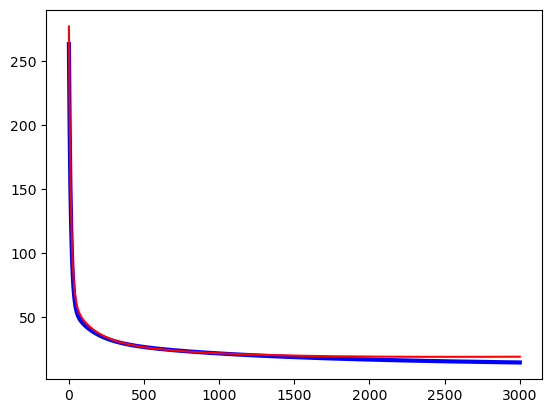

In [49]:
plt.plot(mse_train,color='b',linewidth=3)
plt.plot(mse_test,color='r',linewidth=1.5)

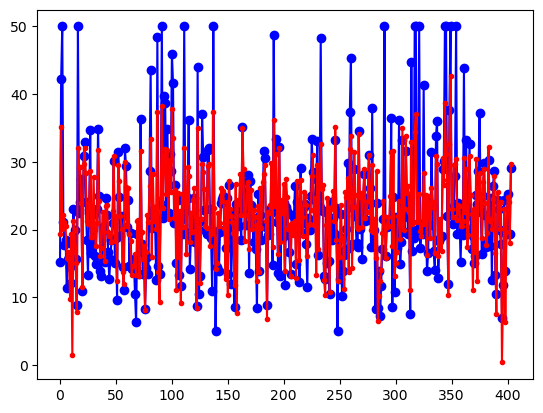

In [50]:
plt.plot(y_train,color='b',marker='o',label='true_price')
plt.plot(PRED_train,color='r',marker='.',label='predict')

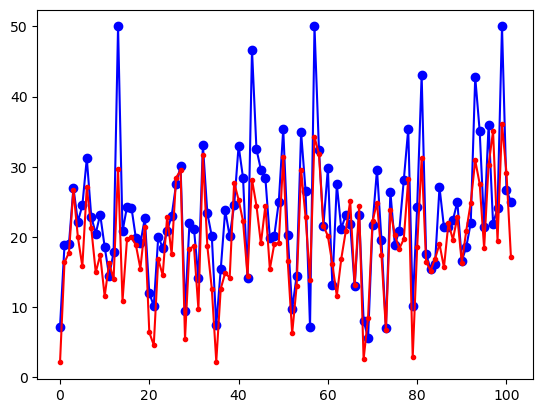

In [51]:
plt.plot(y_test,color='b',marker='o',label='true_price')
plt.plot(PRED_test,color='r',marker='.',label='predict')